In [1]:
import pandas as pd

# Data processing and collection

In [2]:
#Loading the data
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

In [3]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Handling Missing Values

In [6]:
# Replacing the null values in age with the mean of age column
train_data['Age'].fillna(train_data['Age'].mean() , inplace = True)
test_data['Age'].fillna(test_data['Age'].mean() , inplace = True)


In [7]:
# Replacing the null values in Embarked column with the most frequent station
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0] , inplace = True)

test_data['Embarked'].fillna(test_data['Embarked'].mode()[0] , inplace = True)

In [8]:
# Droping the Cabin column
train_data = train_data.drop(columns = 'Cabin')
test_data = test_data.drop(columns = 'Cabin')

In [9]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Analysis

In [10]:
# getting some statistical measures about the data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# finding number of people survived and not survived
train_data.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## Data Visualization

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [13]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

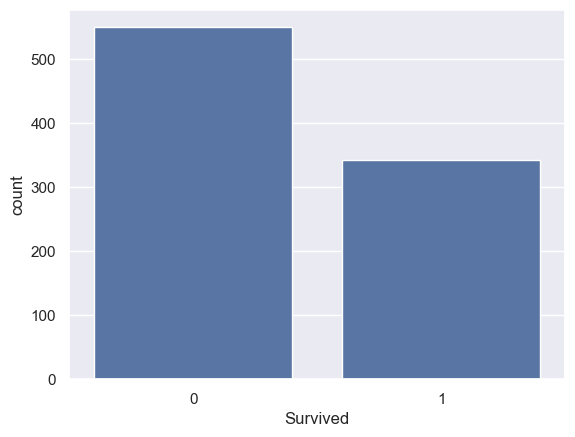

In [14]:
# making a count plot for survived column
sns.countplot(train_data , x = 'Survived')

<Axes: xlabel='Sex', ylabel='count'>

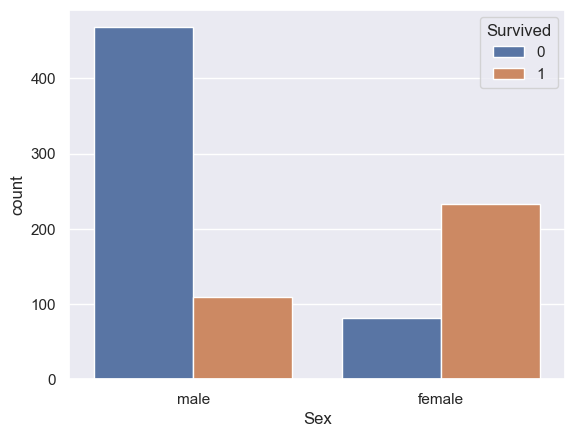

In [15]:
sns.countplot(train_data , x="Sex", hue="Survived")


<Axes: xlabel='Pclass', ylabel='count'>

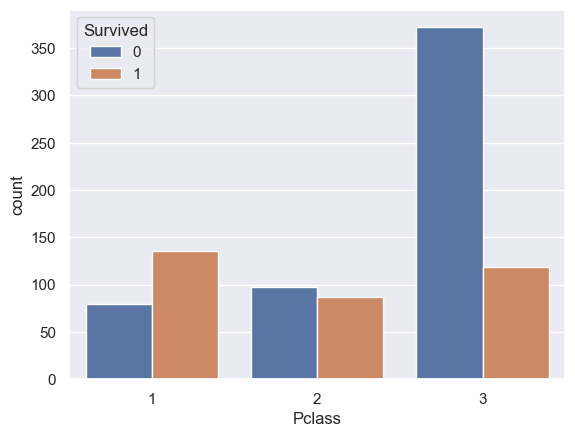

In [16]:
sns.countplot(train_data , x = "Pclass" , hue = "Survived")

In [17]:
print(sns.__version__)

0.13.2


## Encoding the categorical columns

In [18]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [19]:
train_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [20]:
# Converting categorical columns
train_data.replace({'Sex' : {'male' : 0 , 'female' : 1} , 'Embarked' : {'S' : 0 , 'C' : 1 ,'Q' : 2}} , inplace = True)

## Separating target from other features

In [21]:
X = train_data.drop(columns = ['Name', 'Ticket' , 'Survived'] , axis = 1)
Y = train_data.Survived

In [22]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.000000,1,0,7.2500,0
1,2,1,1,38.000000,1,0,71.2833,1
2,3,3,1,26.000000,0,0,7.9250,0
3,4,1,1,35.000000,1,0,53.1000,0
4,5,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,0,27.000000,0,0,13.0000,0
887,888,1,1,19.000000,0,0,30.0000,0
888,889,3,1,29.699118,1,2,23.4500,0
889,890,1,0,26.000000,0,0,30.0000,1


In [23]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Splitting the data into training data and test data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train ,X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 2)

## Model training

In [26]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
# traing the model with training data
model.fit(X_train , Y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model evaluation

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
# Accuracy on training data
X_train_prediction = model.predict(X_train)

In [31]:
accuracyScore = accuracy_score(X_train_prediction, Y_train)

In [32]:
print("Accuarcy Score of training data is " , accuracyScore)  

Accuarcy Score of training data is  0.8160112359550562


In [33]:
# Accuracy score on test data
X_test_prediction = model.predict(X_test)


In [34]:
test_data = test_data.drop(columns = ['Name' , 'Ticket'] , axis = 1)
# Converting categorical columns
test_data.replace({'Sex' : {'male' : 0 , 'female' : 1} , 'Embarked' : {'S' : 0 , 'C' : 1 ,'Q' : 2}} , inplace = True)

test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [35]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [36]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [37]:
test_data_prediction = model.predict(test_data)

In [38]:
test_data_prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [42]:
submission = test_data[['PassengerId']].copy()

In [43]:
submission['Survived'] = test_data_prediction

In [44]:
submission.to_csv('TitanicSubmission.csv', index=False)

In [45]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.50000,0,0,7.8292,2
1,893,3,1,47.00000,1,0,7.0000,0
2,894,2,0,62.00000,0,0,9.6875,2
3,895,3,0,27.00000,0,0,8.6625,0
4,896,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,3,0,30.27259,0,0,8.0500,0
414,1306,1,1,39.00000,0,0,108.9000,1
415,1307,3,0,38.50000,0,0,7.2500,0
416,1308,3,0,30.27259,0,0,8.0500,0


In [46]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
